# **Taller 1 - Ciencia de datos aplicada**
## **Análisis exploratorio de datos**

* Kevin Infante Hernández

## **Problema**
Ayudar a individuos o empresas que buscan invertir en propiedades para alquiler a través de la plataforma Airbnb. Con la creciente popularidad de este modelo de negocio, es cada vez más difícil hacer buenas elecciones de sectores de la ciudad y tipos de propiedades,entre otro tipo de factores, para lograr una rentabilidad adecuada a lo largo del tiempo la cual puede estar dada en términos de una alta tasa de ocupación y un precio por noche que los usuarios estarían dispuestos a pagar.

Se dispone del siguiente conjunto de [datasets](http://insideairbnb.com/get-the-data/) de propiedades listadas en AirBnb para varias ciudades, a las cuales corresponden el siguiente [diccionario de datos](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596). Por cada propiedad se encuentran atributos como ubicación, detalles del host, tipo de propiedad, precio, disponibilidad futura, calificaciones, entre otros. En este trabajo se seleccionó el dataset de Buenos Aires, Argentina.

## **Objetivos**
*   Encontrar las propiedades más relevantes en el set de datos que permitan obtener insights que le permitan a los inversionistas tomar decisiones acertadas sobre que sectores de la ciudad y tipos de propiedades son más rentables.
*   Realizar un análisis estadístico y gráfico univariado y multivariado sobre las propiedades más relevantes en el set de datos.
*   Presentar un informe en el que se realicen recomendaciones a los inversionistas sobre en que tipo de propiedades invertir.



### 0. Importación de paquetes

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de pandas para expandir el número de filas y columnas por defecto a mostrar
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Cambiar el formato en el que se muestran los valores float
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Libreria para graficos de burbujas
import plotly.graph_objects as go

### 1. Entendimiento general de datos

Se procede con el cargue de información

In [54]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./data/listings.csv.gz")

Dimensiones del dataset

In [4]:
listings_df.shape

(26204, 75)

Tipos de columna

In [5]:
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

Muestra de 5 registros al azar

In [6]:
listings_df.sample(5) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
15329,699980204825561709,https://www.airbnb.com/rooms/699980204825561709,20230628025456,2023-06-28,city scrape,Rental unit in Recoleta · ★4.45 · 1 bedroom · ...,"Dos Ambientes con un dormitorio, living y coci...",En la zona se encuentran las tiendas más comer...,https://a0.muscache.com/pictures/miso/Hosting-...,35067450,https://www.airbnb.com/users/show/35067450,Ignacio,2015-06-05,"Buenos Aires, Argentina","Easy going, it would be a pleassure that you s...",within an hour,100%,99%,f,https://a0.muscache.com/im/pictures/user/50bf3...,https://a0.muscache.com/im/pictures/user/50bf3...,Palermo,42,46,"['email', 'phone']",t,t,"Recoleta, Buenos Aires, Argentina",Recoleta,NaN,-34.593433,-58.412691,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Air conditioning"", ""Kitchen"", ""HDTV with Net...","$8,552.00",3,90,1,3,90,1125,2.3,594.2,NaN,t,19,49,79,176,2023-06-28,11,11,0,2022-08-28,2023-04-09,4.45,4.45,4.18,4.55,4.82,4.91,4.27,NaN,t,33,33,0,0,1.08
25537,910677359674008351,https://www.airbnb.com/rooms/910677359674008351,20230628025456,2023-06-29,city scrape,Condo in Buenos Aires · ★New · 1 bedroom · 1 b...,NaN,The San Nicolas neighborhood has multiple alte...,https://a0.muscache.com/pictures/miso/Hosting-...,217335764,https://www.airbnb.com/users/show/217335764,Ivan,2018-09-26,"Buenos Aires, Argentina",Hola soy Iván y espero poder brindarte la mejo...,within an hour,100%,NaN,NaN,https://a0.muscache.com/im/pictures/user/c2c3e...,https://a0.muscache.com/im/pictures/user/c2c3e...,NaN,1,1,"['email', 'phone']",t,t,"Buenos Aires, Argentina",San Nicolas,NaN,-34.607986,-58.385067,Private room in condo,Private room,2,NaN,1 shared bath,NaN,1.0,"[""Outdoor dining area"", ""Kitchen"", ""Smoking al...","$2,685.00",1,365,1,1,365,365,1.0,365.0,NaN,t,0,0,26,205,2023-06-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
21751,847727986431693254,https://www.airbnb.com/rooms/847727986431693254,20230628025456,2023-06-29,city scrape,Rental unit in Buenos Aires · ★4.33 · 1 bedroo...,"Situado en el corazón de Palermo Soho, este he...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,447546180,https://www.airbnb.com/users/show/447546180,Teros,2022-03-02,"Buenos Aires, Argentina",NaN,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/1c7fa...,https://a0.muscache.com/im/pictures/user/1c7fa...,Palermo Hollywood,9,10,"['email', 'phone']",t,t,NaN,Palermo,NaN,-34.581023,-58.425769,Entire rental unit,Entire home/apt,6,NaN,1.5 baths,1.0,3.0,"[""Free street parking"", ""Hot water"", ""Paid par...","$11,899.00",2,365,2,2,1125,1125,2.0,1125.0,NaN,t,13,43,73,348,2023-06-29,6,6,0,2023-03-20,2023-05-22,4.33,4.83,4.67,4.83,4.33,4

Ya que se cuenta con el Id del inmueble, se verifica que hayan 26,204 registros únicos de Id, descartando así la presencia de propiedades duplicadas

In [4]:
listings_df["id"].nunique()

26204

Dado el contecto de negocio en el que se buscan hallar los atributos de propiedades que le puedan generar mayores ganancias a los inversionistas, el top5 de atributos a analizar es el siguiente:
* price (Precio por noche y por persona)
* accommodates (Personas por habitación)
* neighbourhood_cleansed (Barrio)
* room_type (Tipo de habitación)
* availability_365 (Disponibilidad en los siguientes 365 días)

### 2. Análisis univariado

#### 2.1. Atributos principales

##### Precio

Conversión a float

In [55]:
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

Datos estadísticos básicos

In [48]:
listings_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count      26204.00000
mean       17529.32869
std       175401.77107
min          175.00000
5%          4331.00000
25%         7406.50000
50%        10190.00000
75%        15286.00000
95%        33976.75000
max     25295088.00000
Name: price_float, dtype: float64

Numero de nulos

In [ ]:
price_nan_count = listings_df["price_float"].isna().sum()
print(price_nan_count)

0


Boxplot para encontrar outliers

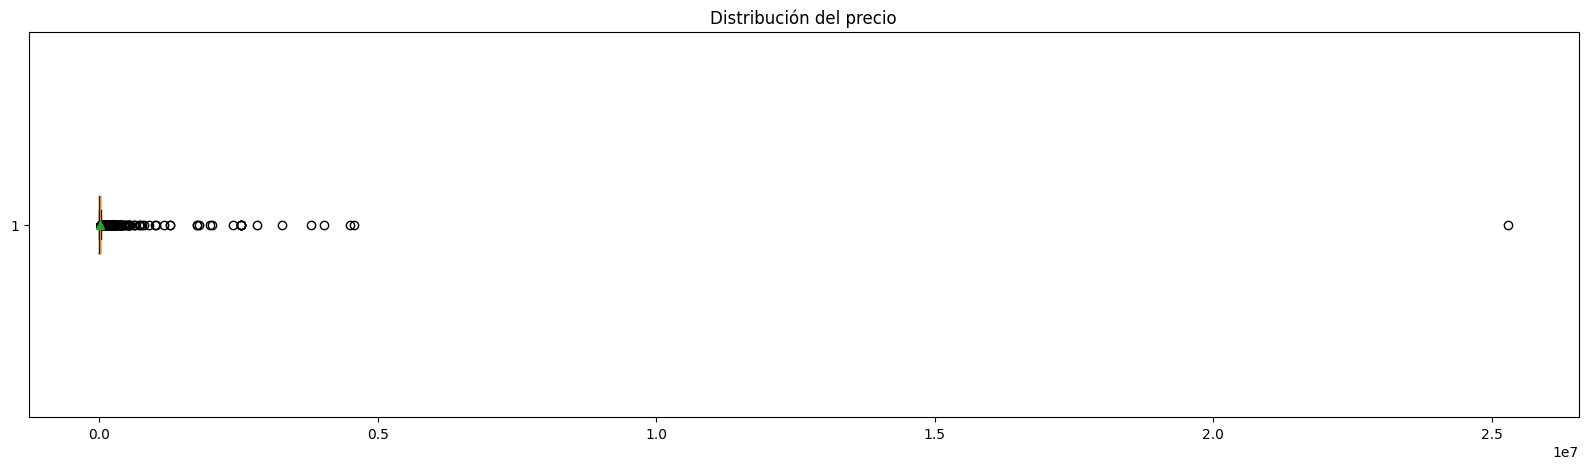

In [49]:
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["price_float"], showmeans=True, vert=False)
plt.title("Distribución del precio")
plt.show()

Ya que se tienen varios outlier cuyo valor sobrepasa en gran medida los demás, se descartan estos outlier con el fin de no afectar los análisis posteriores 

Se cuenta el numero total de outliers a ser descartados

In [57]:
listings_df_out =  listings_df.loc[listings_df["price_float"] > 100000]
print(listings_df_out.shape)

(196, 76)


Se descartan los outliers

In [58]:
listings_df =  listings_df.loc[listings_df["price_float"] <= 100000]

Se grafica nuevamente el Boxsplot

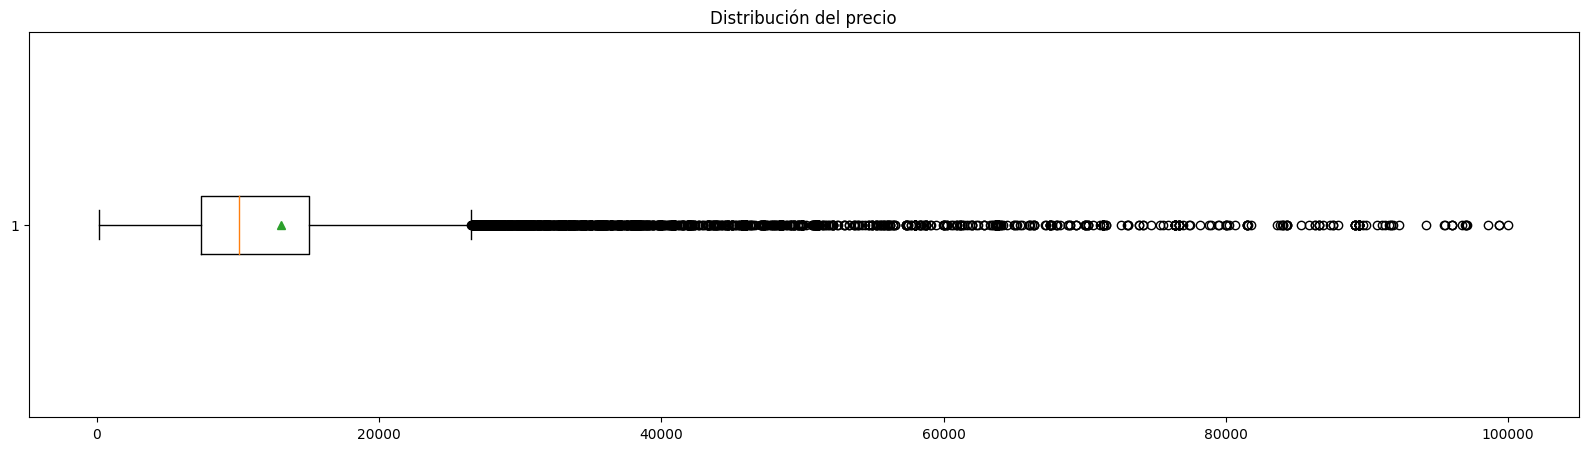

In [59]:
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["price_float"], showmeans=True, vert=False)
plt.title("Distribución del precio")
plt.show()

Nuevas dimensiones del dataset

In [60]:
listings_df.shape

(26008, 76)

##### Disponibilidad 365

Datos estadísticos básicos

In [61]:
listings_df["availability_365"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count   26008.00000
mean      213.88519
std       127.33295
min         0.00000
5%          0.00000
25%        89.00000
50%       226.00000
75%       341.00000
95%       365.00000
max       365.00000
Name: availability_365, dtype: float64

Numero de nulos

In [62]:
price_nan_count = listings_df["availability_365"].isna().sum()
print(price_nan_count)

0


Boxplot para encontrar outliers

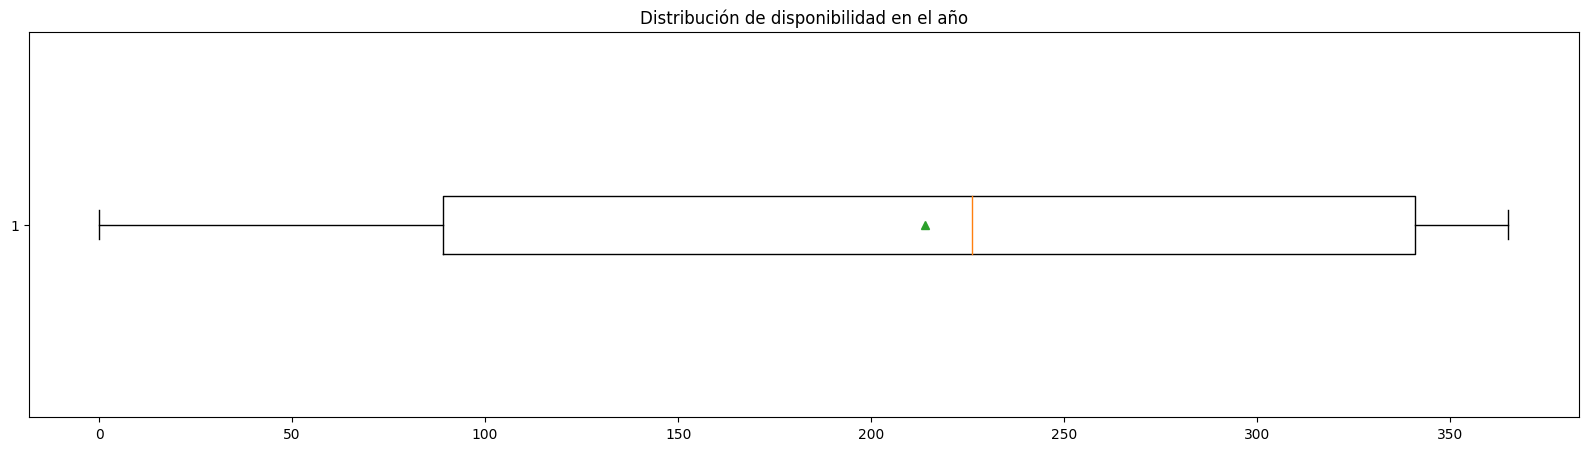

In [63]:
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["availability_365"], showmeans=True, vert=False)
plt.title("Distribución de disponibilidad en el año")
plt.show()

Distribucion de los valores

[]

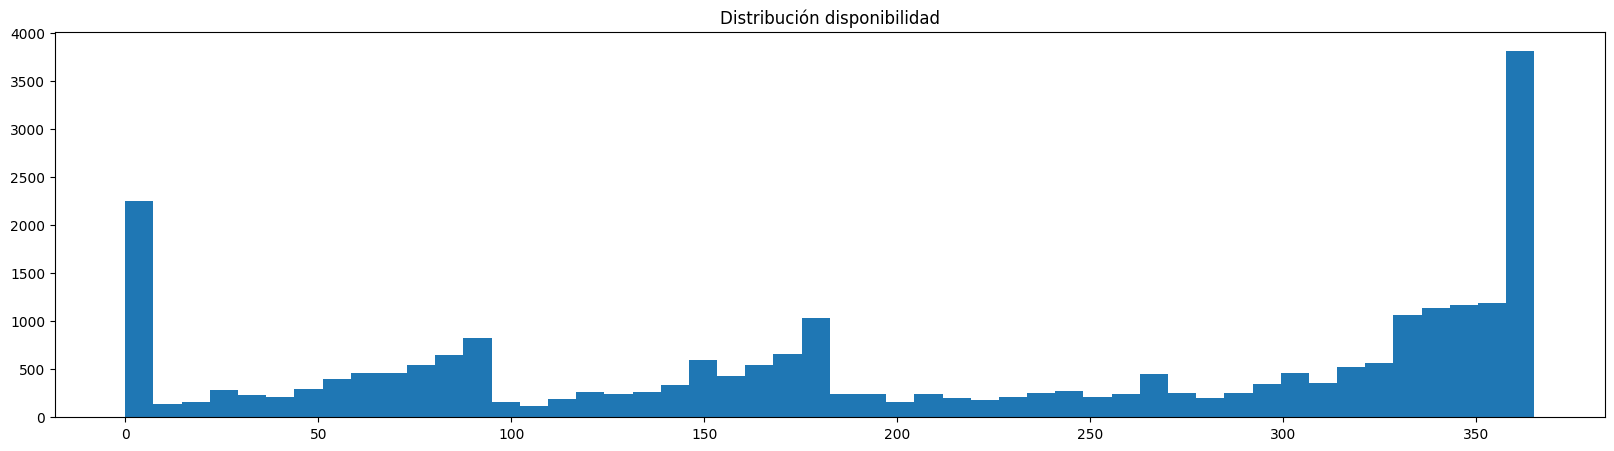

In [64]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df["availability_365"],bins=50)
plt.title("Distribución disponibilidad")
plt.plot()

#### 2.2. Atributos dependientes

##### Barrio

Total de barrios

In [65]:
listings_df["neighbourhood_cleansed"].nunique()

48

Número de propiedades que no tienen barrio asignado

In [6]:
(listings_df['neighbourhood_cleansed'].values == '').sum()

0

Tabla de frecuencias

In [66]:
neighbourhood_frec_sum = listings_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=True)
print(neighbourhood_frec_sum)

Palermo             0.33540
Recoleta            0.14884
San Nicolas         0.05890
Belgrano            0.05429
Retiro              0.04791
Monserrat           0.03960
Almagro             0.03568
Villa Crespo        0.03399
Balvanera           0.03214
San Telmo           0.02707
Colegiales          0.02384
Nuñez               0.02299
Caballito           0.01953
Chacarita           0.01642
Constitucion        0.01284
Villa Urquiza       0.01242
Puerto Madero       0.01134
Barracas            0.00781
Saavedra            0.00711
San Cristobal       0.00534
Flores              0.00469
Villa Ortuzar       0.00396
Villa Devoto        0.00350
Coghlan             0.00346
Boca                0.00331
Boedo               0.00323
Villa Del Parque    0.00315
Parque Chacabuco    0.00261
Parque Patricios    0.00258
Parque Chas         0.00235
Villa Pueyrredon    0.00208
Paternal            0.00158
Agronomia           0.00154
Floresta            0.00142
Villa Santa Rita    0.00123
Villa Luro          

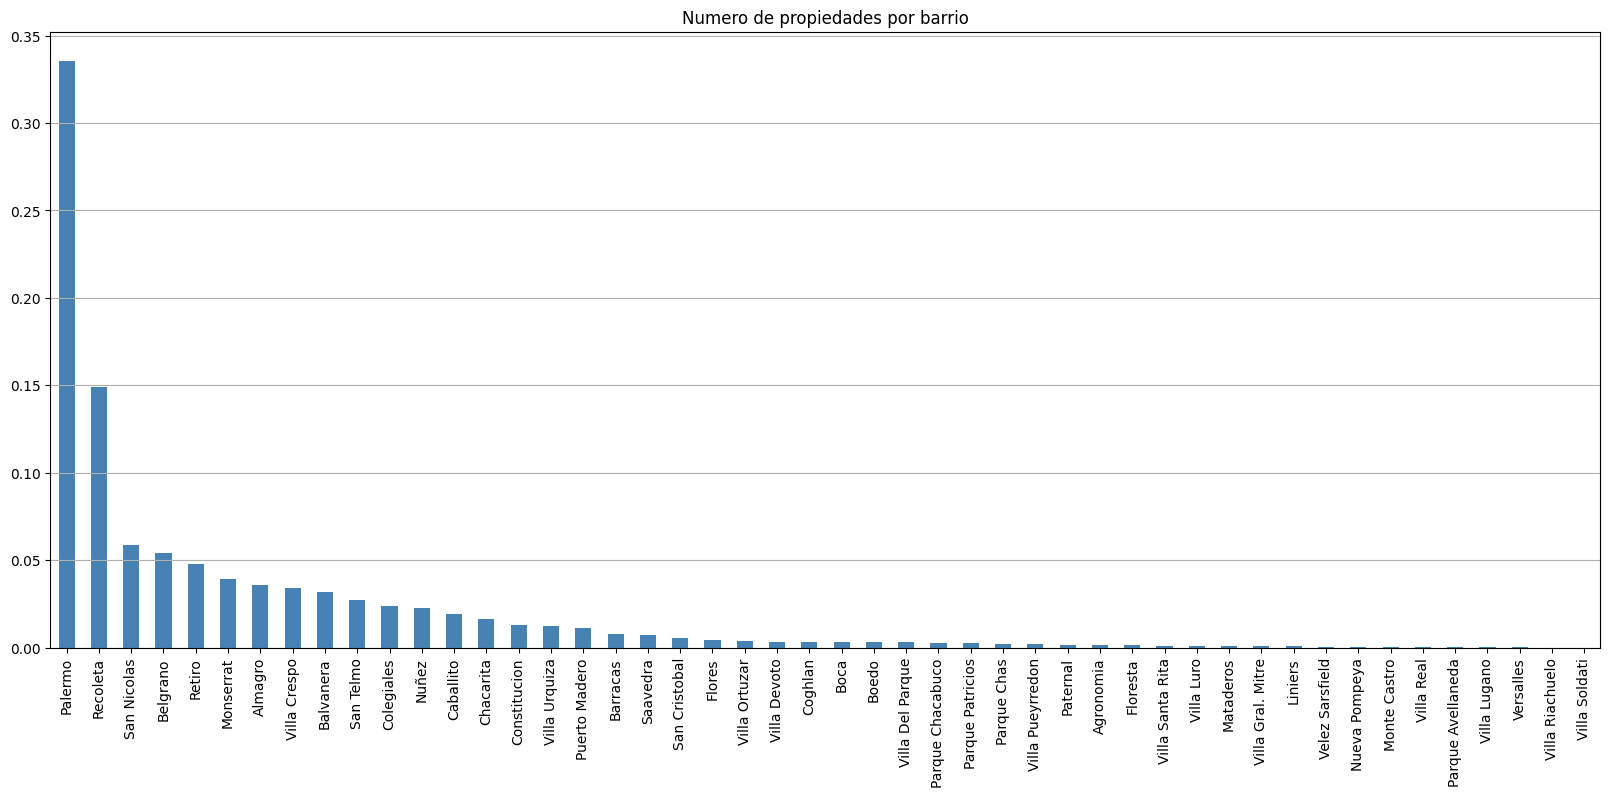

In [67]:
plt.figure(figsize=(20, 8))
neighbourhood_frec_sum.plot(kind="bar", color="steelblue")
plt.title("Numero de propiedades por barrio")
plt.grid(axis="y")
plt.show()

Análisis de Pareto

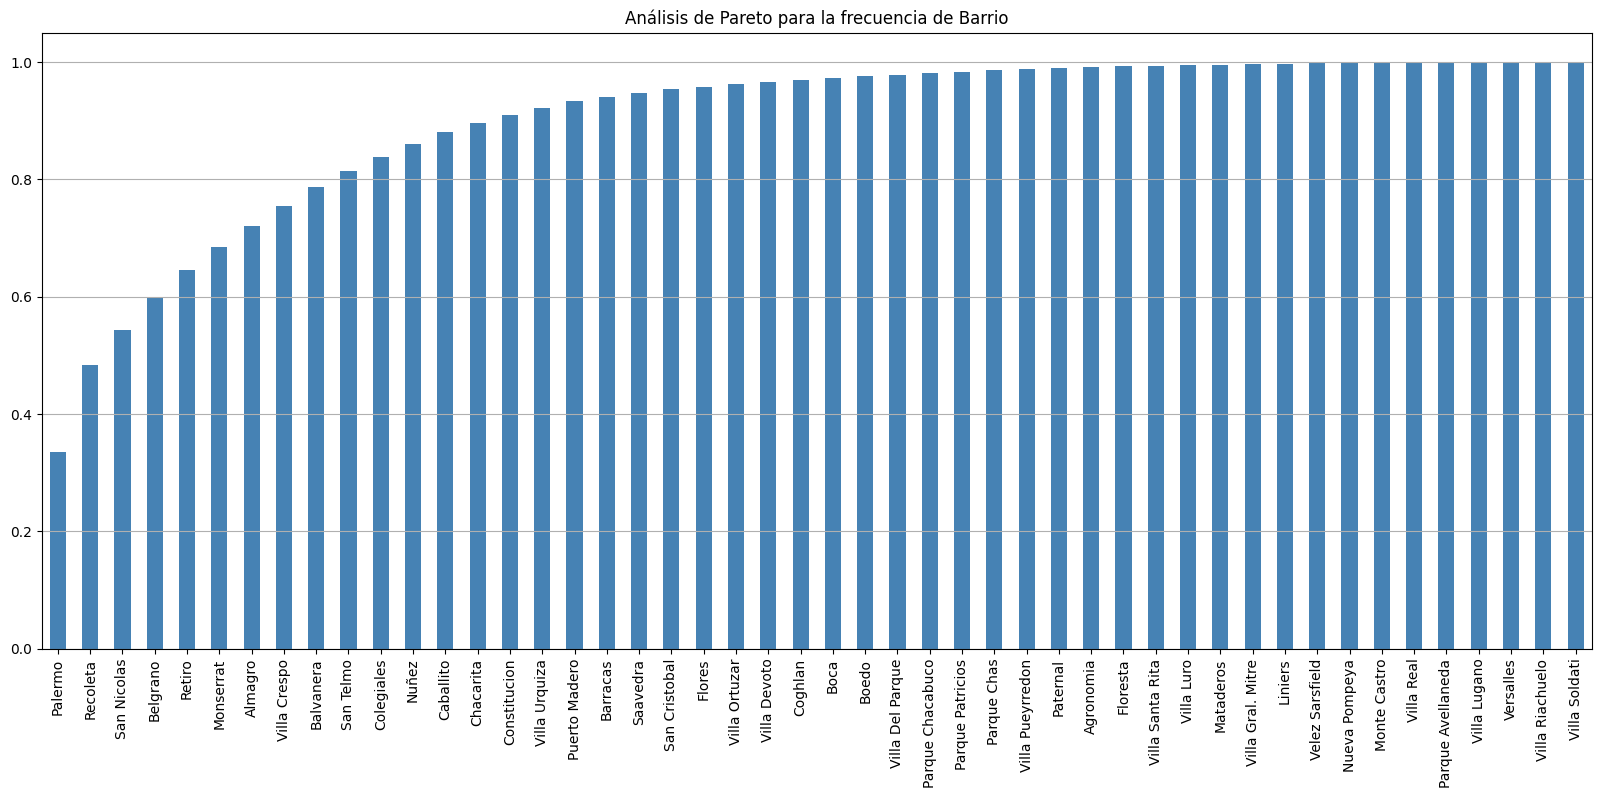

In [68]:
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Análisis de Pareto para la frecuencia de Barrio")
plt.grid(axis="y")
plt.show()

##### Tipo de habitación

Total de tipos de habitación

In [7]:
listings_df["room_type"].nunique()

4

Número de propiedades que no tienen tipo de habitación asignado

In [8]:
(listings_df['room_type'].values == '').sum()

0

Tabla de frecuencias

In [69]:
room_type_frec_sum = listings_df["room_type"].value_counts(dropna=False, normalize=True)
print(room_type_frec_sum)

Entire home/apt   0.89972
Private room      0.08882
Shared room       0.00769
Hotel room        0.00377
Name: room_type, dtype: float64


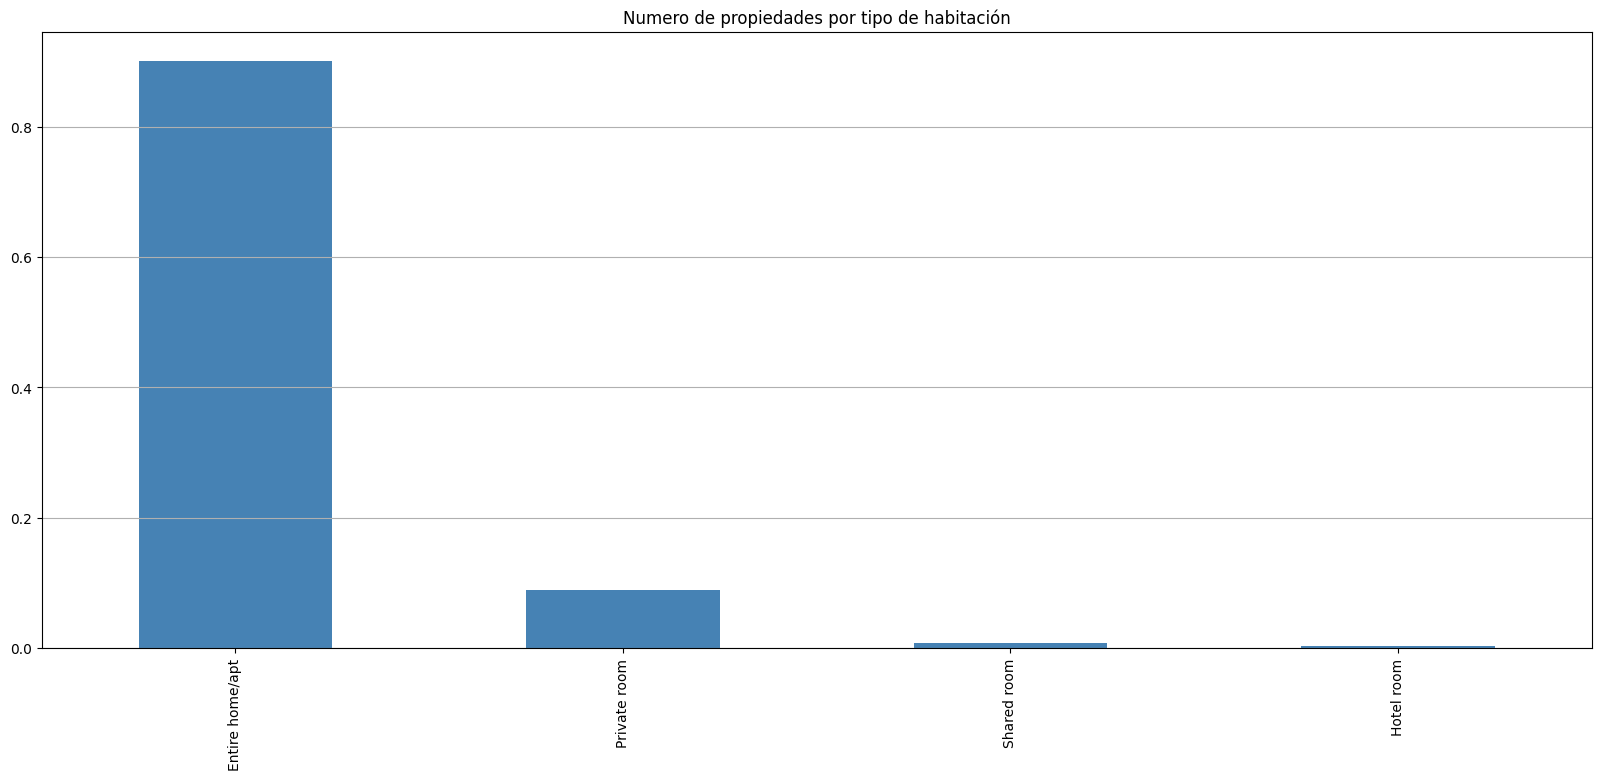

In [70]:
plt.figure(figsize=(20, 8))
room_type_frec_sum.plot(kind="bar", color="steelblue")
plt.title("Numero de propiedades por tipo de habitación")
plt.grid(axis="y")
plt.show()

Análisis de Pareto

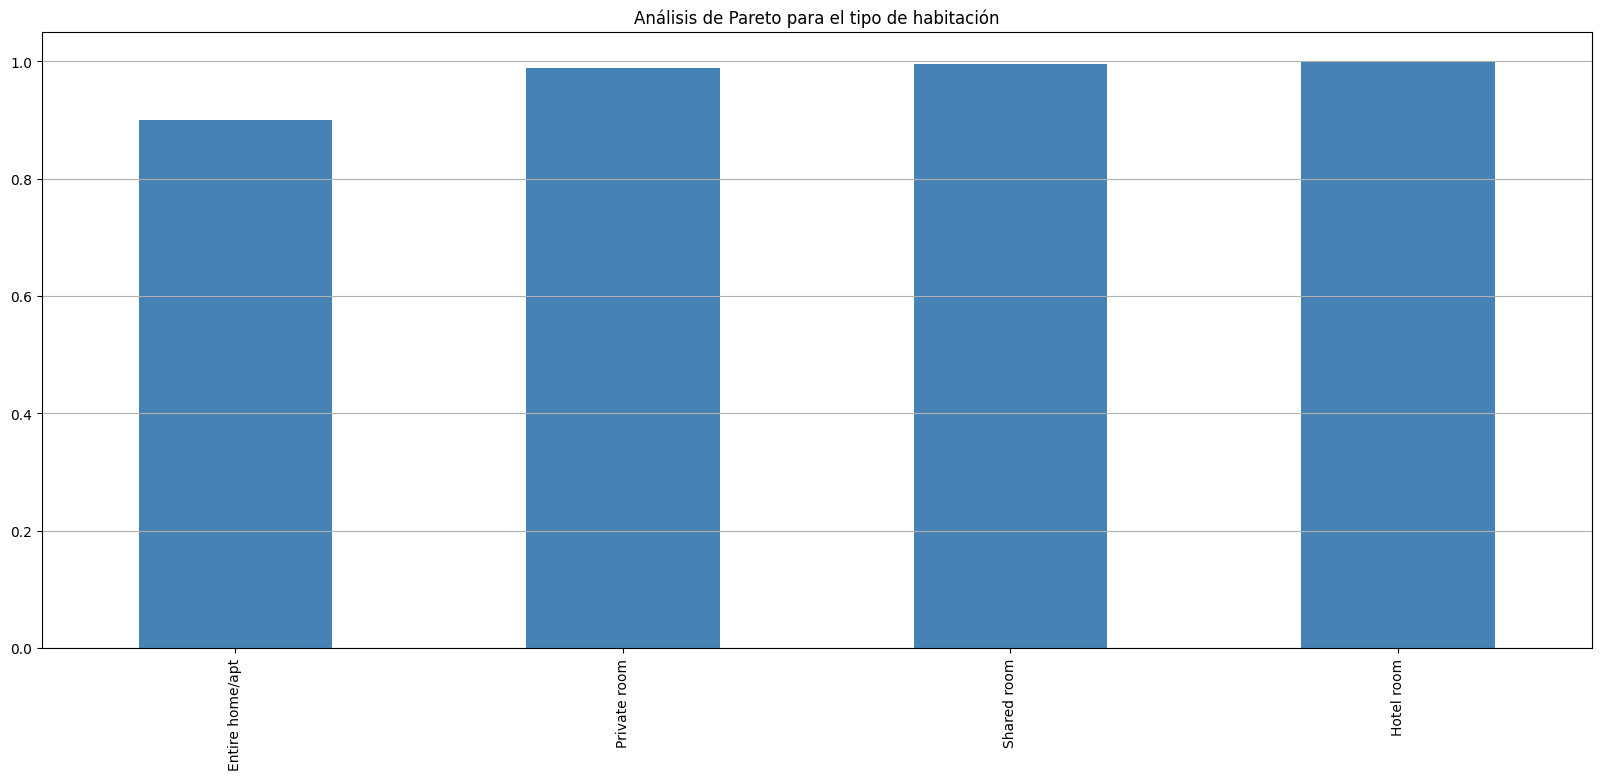

In [71]:
room_type_frec_cumsum = listings_df["room_type"].value_counts(normalize=True).cumsum()

plt.figure(figsize=(20, 8))
room_type_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Análisis de Pareto para el tipo de habitación")
plt.grid(axis="y")
plt.show()

##### Tipo de propiedad

Tabla de frecuencias

In [72]:
property_type_frec_sum = listings_df["property_type"].value_counts(dropna=False, normalize=True)
print(property_type_frec_sum)

Entire rental unit                   0.66610
Entire condo                         0.12685
Private room in rental unit          0.03710
Entire serviced apartment            0.03664
Entire loft                          0.02826
Private room in home                 0.02103
Entire vacation home                 0.01792
Entire home                          0.01692
Private room in condo                0.00727
Private room in casa particular      0.00419
Room in hotel                        0.00335
Private room in bed and breakfast    0.00311
Private room in serviced apartment   0.00269
Shared room in home                  0.00231
Shared room in rental unit           0.00219
Room in boutique hotel               0.00192
Private room in townhouse            0.00192
Private room in villa                0.00169
Casa particular                      0.00165
Room in bed and breakfast            0.00161
Private room in guesthouse           0.00131
Entire townhouse                     0.00131
Room in ap

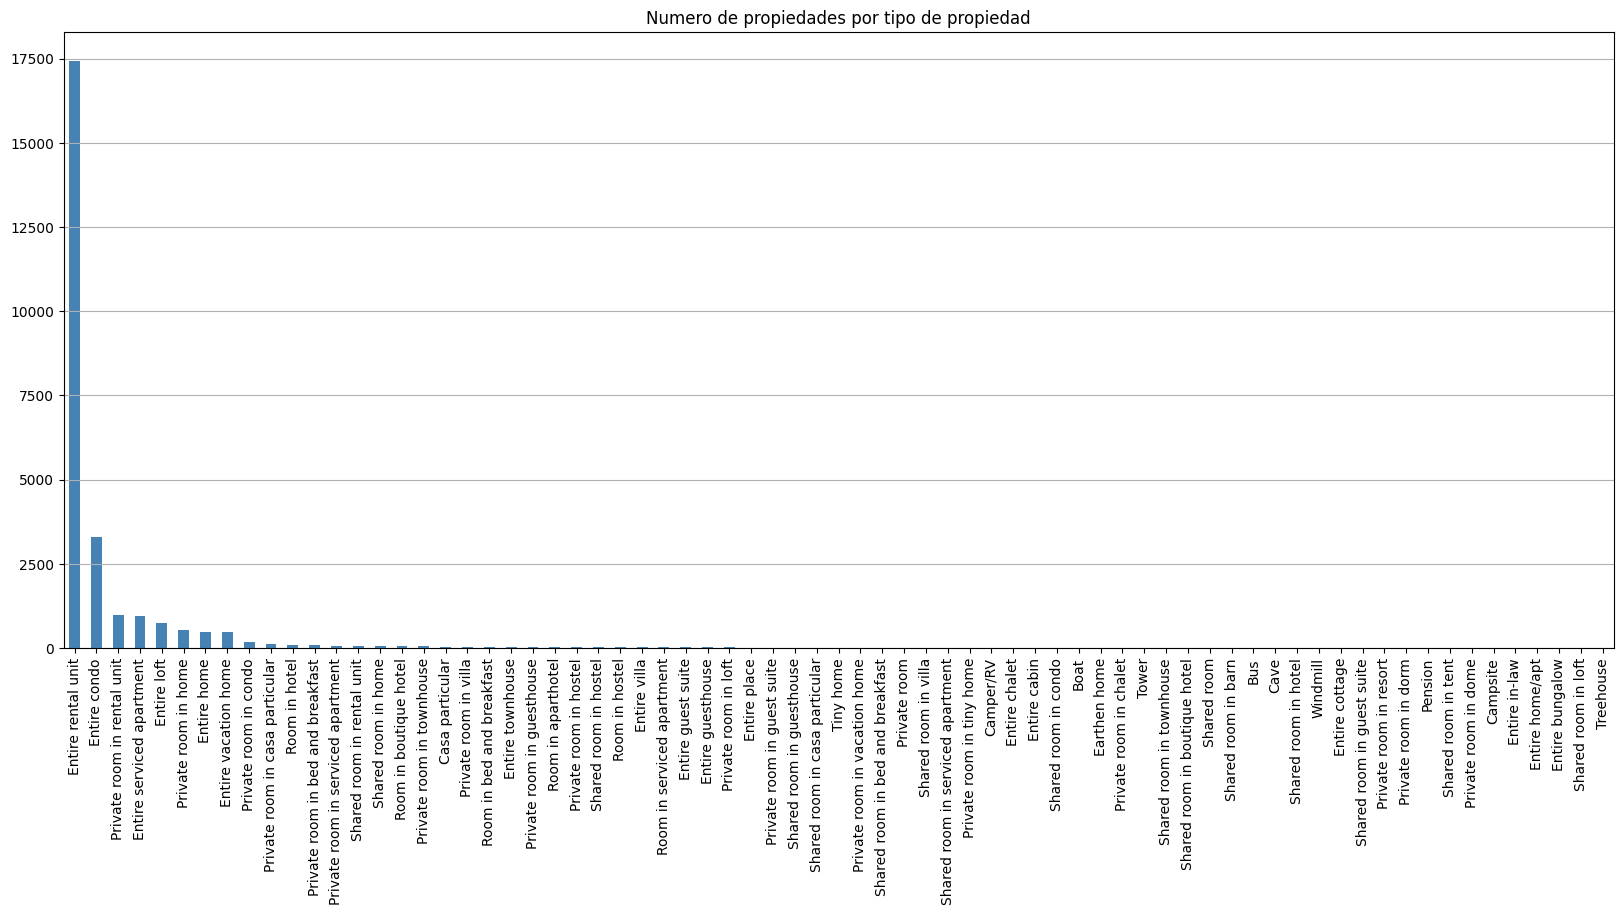

In [121]:
plt.figure(figsize=(20, 8))
property_type_frec_sum.plot(kind="bar", color="steelblue")
plt.title("Numero de propiedades por tipo de propiedad")
plt.grid(axis="y")
plt.show()

Análisis de Pareto

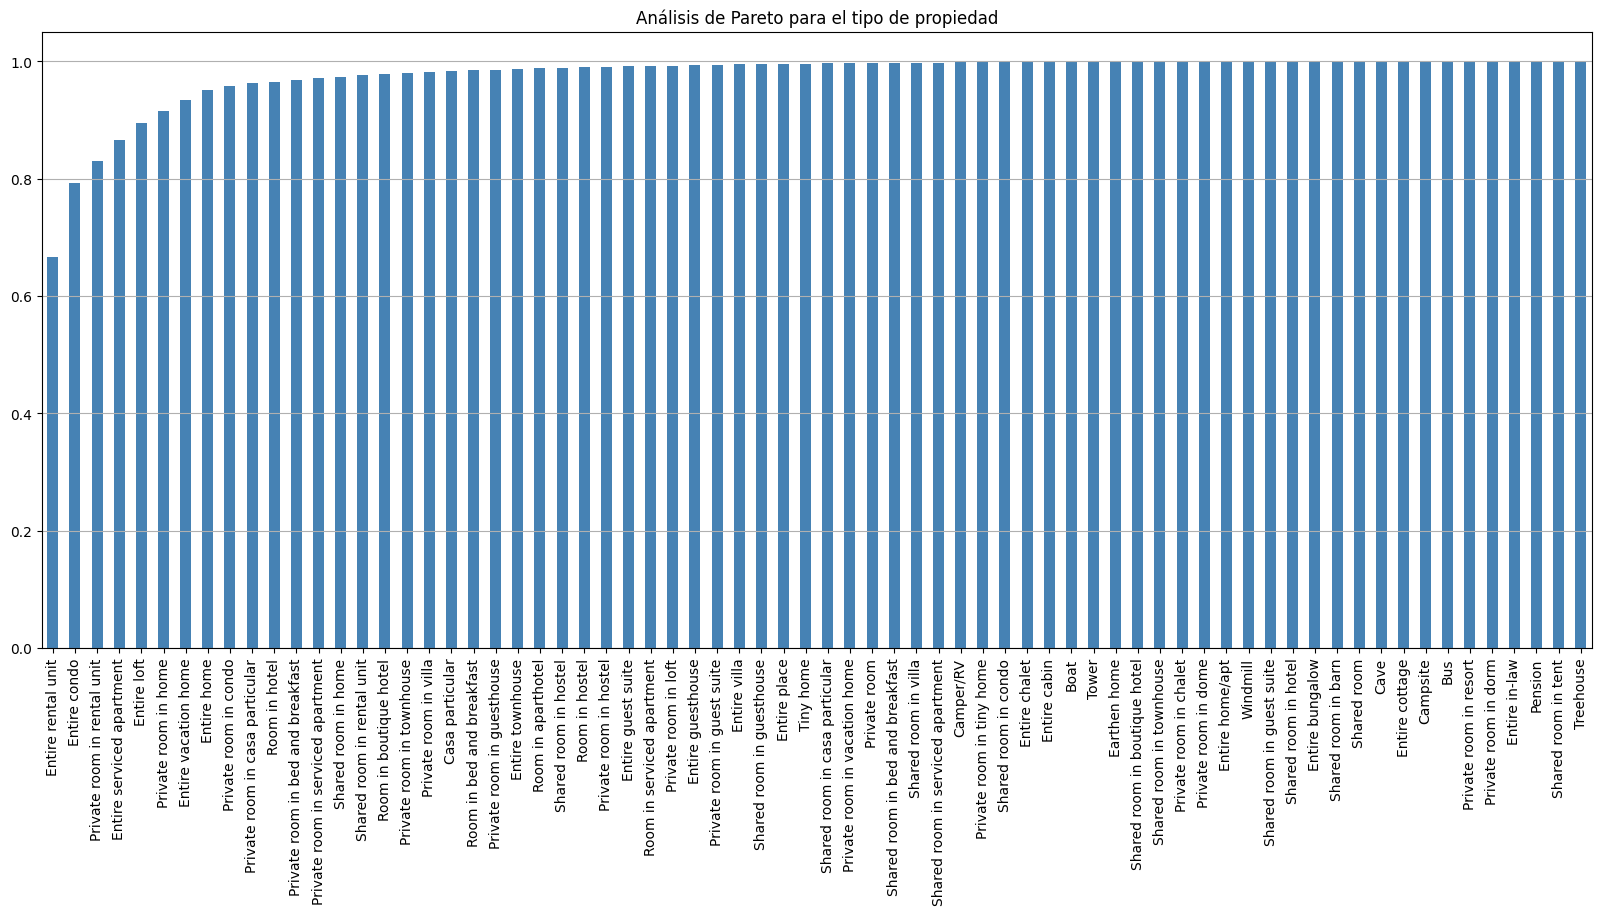

In [73]:
property_type_frec_cumsum = listings_df["property_type"].value_counts(normalize=True).cumsum()

plt.figure(figsize=(20, 8))
property_type_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Análisis de Pareto para el tipo de propiedad")
plt.grid(axis="y")
plt.show()

##### Capacidad de huespedes

Datos estadísticos básicos

In [74]:
listings_df["accommodates"].describe()

count   26008.00000
mean        2.85535
std         1.41239
min         1.00000
25%         2.00000
50%         2.00000
75%         4.00000
max        16.00000
Name: accommodates, dtype: float64

Numero de nulos

In [75]:
accomodates_nan_count = listings_df["accommodates"].isna().sum()
print(accomodates_nan_count)

0


Boxplot para encontrar outliers

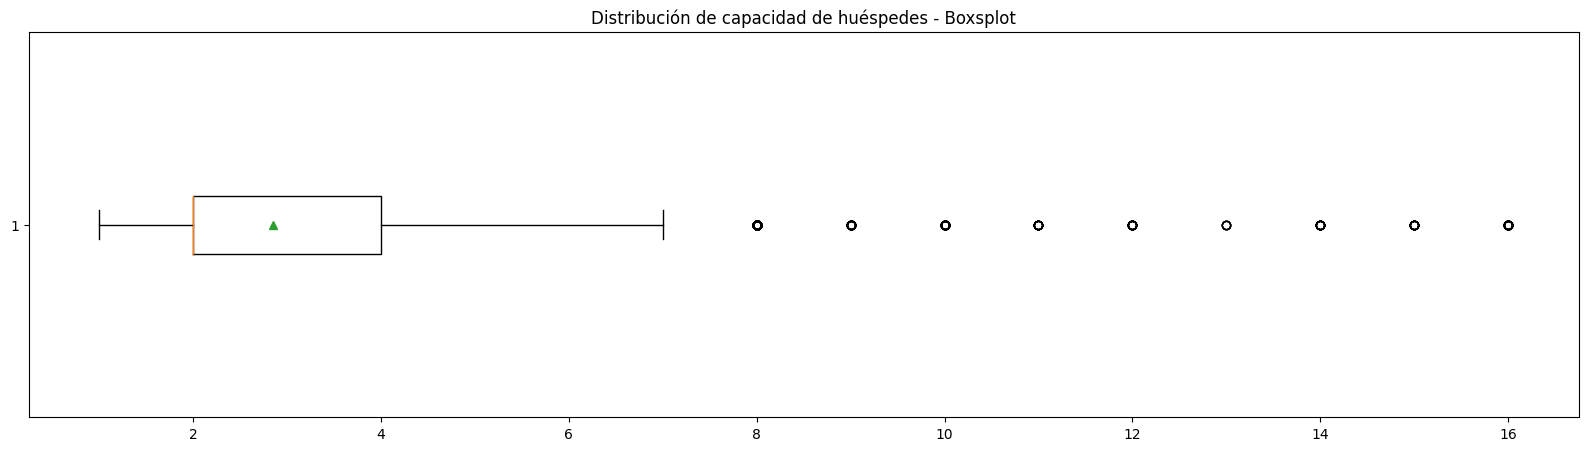

In [76]:
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["accommodates"], showmeans=True, vert=False)
plt.title("Distribución de capacidad de huéspedes - Boxsplot")
plt.show()

Distribución de capacidad de huéspedes

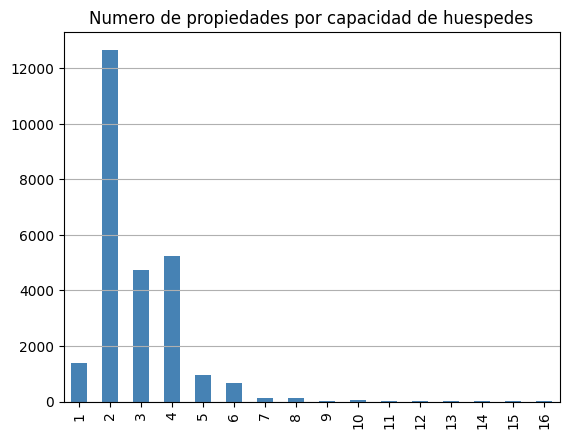

In [77]:
listings_df["accommodates"].value_counts(normalize=False)[np.sort(listings_df.accommodates.unique())].plot(kind="bar", color="steelblue")
plt.title("Numero de propiedades por capacidad de huespedes")
plt.grid(axis="y")
plt.show()

### 3. Análisis multivariado - Mejor estrategia inmobiliaria

#### Correlación calificación del inmueble y precio

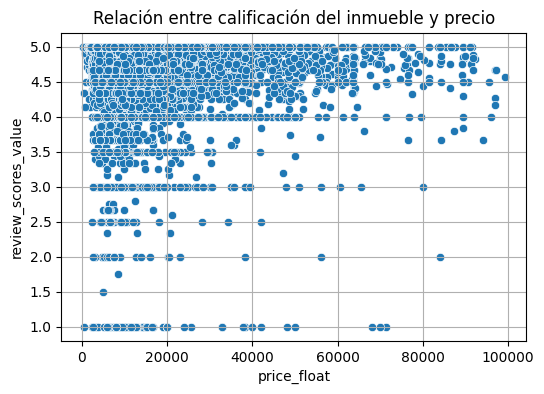

In [82]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=listings_df["price_float"],
    y=listings_df["review_scores_value"]
)
plt.title("Relación entre calificación del inmueble y precio")
plt.grid()
plt.show()

#### Precio y disponibilidad por barrio, tipo de inmueble, numero de huespedes y tipo de propiedad

##### Precio y disponibilidad por barrio

In [83]:
grouped = listings_df.groupby('neighbourhood_cleansed')
average_price = grouped["price_float"].mean()
average_price.name = "average_price"

count = grouped["price_float"].count()
count.name="count"

availability_365 = grouped["availability_365"].mean()
availability_365.name = "availability_365"

df = pd.concat([average_price,count,availability_365],axis=1)
df["relative_count"] = (df["count"]/listings_df["price_float"].count())*100
#df["average_price_discounted"] = (df["average_price"]*((365-df["availability_365"])/365))
df["relative_count_int"] = df["relative_count"].apply(np.ceil) * 3
df["occupancy"] = 365-df["availability_365"]
print(df.sort_values(by=["average_price"],ascending=False).head(5))


                        average_price  count  availability_365  \
neighbourhood_cleansed                                           
Puerto Madero             28845.26102    295         220.05085   
Villa Real                17647.37500      8         127.37500   
Retiro                    14985.57384   1246         219.80177   
Floresta                  14775.78378     37         194.78378   
Palermo                   14650.65551   8723         212.89316   

                        relative_count  relative_count_int  occupancy  
neighbourhood_cleansed                                                 
Puerto Madero                  1.13427             6.00000  144.94915  
Villa Real                     0.03076             3.00000  237.62500  
Retiro                         4.79083            15.00000  145.19823  
Floresta                       0.14226             3.00000  170.21622  
Palermo                       33.53968           102.00000  152.10684  


In [84]:
print(df.sort_values(by=["availability_365"],ascending=True).head(6))

                        average_price  count  availability_365  \
neighbourhood_cleansed                                           
Villa Soldati              4000.00000      1           0.00000   
Villa Riachuelo            3826.66667      3          30.00000   
Versalles                  8348.20000      5         123.80000   
Villa Real                17647.37500      8         127.37500   
Parque Avellaneda          4511.85714      7         168.14286   
Villa Gral. Mitre         10391.80000     20         182.60000   

                        relative_count  relative_count_int  occupancy  
neighbourhood_cleansed                                                 
Villa Soldati                  0.00384             3.00000  365.00000  
Villa Riachuelo                0.01153             3.00000  335.00000  
Versalles                      0.01922             3.00000  241.20000  
Villa Real                     0.03076             3.00000  237.62500  
Parque Avellaneda              0.02691 

Se realiza un gráfico de burbujas para mostrar la relación entre precio por noche (eje x), ocupación en el año (eje y), y número de propiedades en el barrio (tamaño de la burbuja). El inversionista puede seleccionar la región de su interés haciendo click sostenido en ella.

In [85]:
fig = go.Figure()

for ind in df.index:
    fig.add_trace(go.Scatter(
        x=[df["average_price"][ind]], y=[df["occupancy"][ind]],
        name=ind,
        marker_size=df["relative_count_int"][ind],
        ))

fig.update_layout(
    title='Precio por noche vs ocupación en el año',
    xaxis=dict(
        title='Precio por noche',
    ),
    yaxis=dict(
        title='Ocupación en el año (dias)',
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)')

fig.show()

Distribución de precios en barrios con mayor promedio de precio en muestra representativa

In [86]:
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

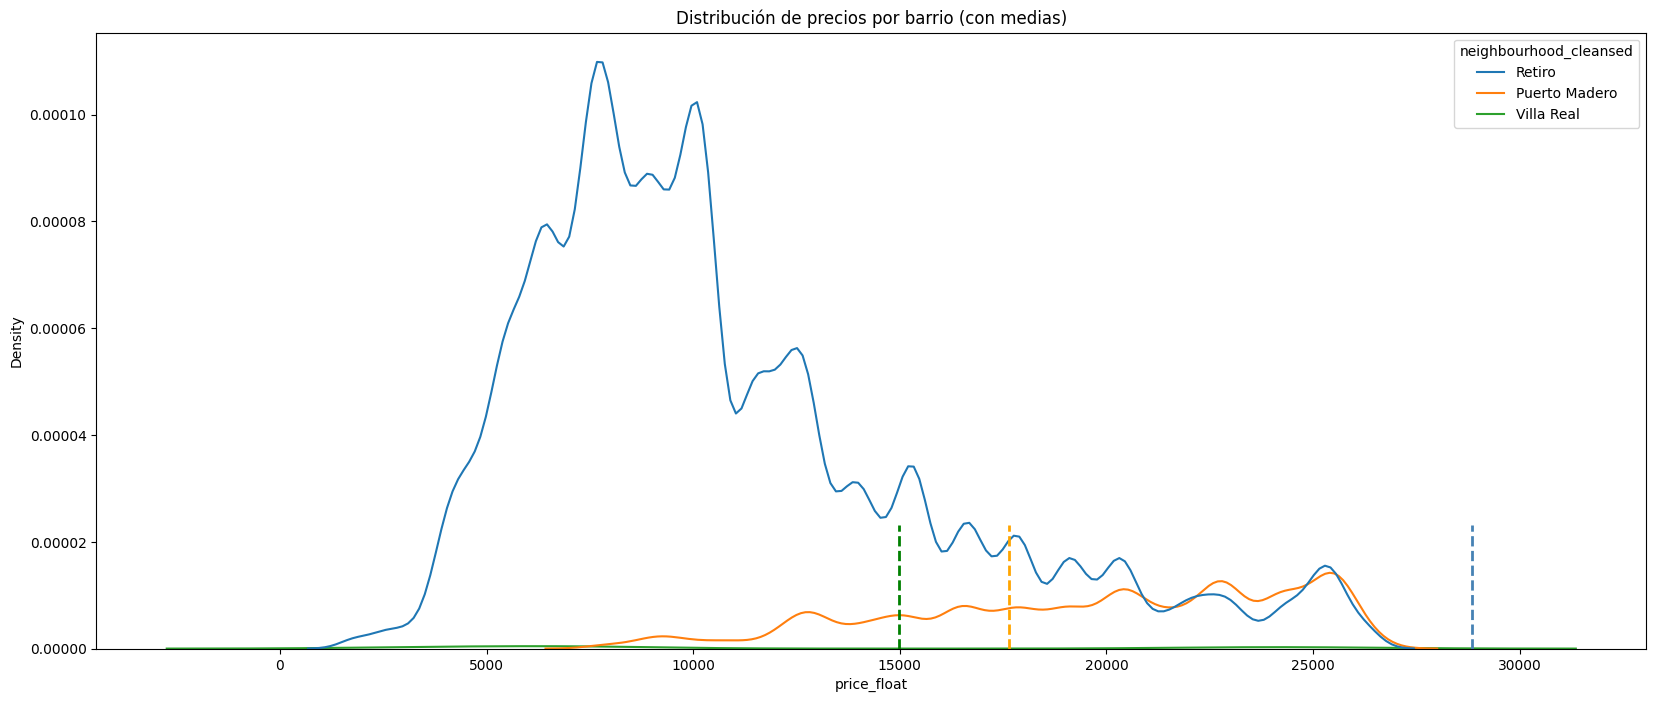

In [88]:
most_expensive_neighbourhoods = average_price.sort_values(ascending=False).iloc[:3].index.array
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["neighbourhood_cleansed"].isin(most_expensive_neighbourhoods)].loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_expensive_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Distribución de precios por barrio (con medias)")
plt.show()

##### Precio promedio por tipo de habitación

In [89]:
grouped = listings_df.groupby('room_type')
average_price = grouped["price_float"].mean()
average_price.name = "average_price"

count = grouped["price_float"].count()
count.name="count"

availability_365 = grouped["availability_365"].mean()
availability_365.name = "availability_365"

df = pd.concat([average_price,count,availability_365],axis=1)
print(df.sort_values(by=["average_price"],ascending=False))

                 average_price  count  availability_365
room_type                                              
Hotel room         14768.51020     98         276.02041
Entire home/apt    13568.78923  23400         214.24444
Private room        8522.60087   2310         204.46753
Shared room         5204.41500    200         250.18000


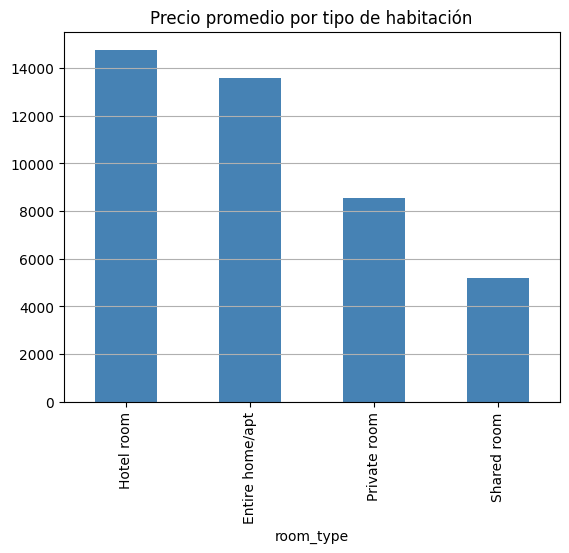

In [90]:
average_price.sort_values(ascending=False).plot(kind="bar", color="steelblue")
plt.title("Precio promedio por tipo de habitación")
plt.grid(axis="y")
plt.show()

##### Precio y disponibilidad promedio por capacidad de huespedes

In [91]:
grouped = listings_df.groupby('accommodates')
average_price = grouped["price_float"].mean()
average_price.name = "average_price"

count = grouped["price_float"].count()
count.name="count"

availability_365 = grouped["availability_365"].mean()
availability_365.name = "availability_365"

df = pd.concat([average_price,count,availability_365],axis=1)
df["relative_count"] = (df["count"]/listings_df["price_float"].count())*100
print(df.sort_values(by=["average_price"],ascending=False))

              average_price  count  availability_365  relative_count
accommodates                                                        
12              54268.29412     17         273.76471         0.06536
10              53383.79487     39         250.23077         0.14995
9               51251.12903     31         271.29032         0.11919
11              48056.75000     12         255.50000         0.04614
14              46592.69231     13         270.92308         0.04998
16              41228.96875     32         278.00000         0.12304
15              39143.46154     13         217.76923         0.04998
13              38887.25000      4          70.50000         0.01538
8               36683.57983    119         234.49580         0.45755
7               33321.39640    111         222.85586         0.42679
6               28066.84412    680         223.77500         2.61458
5               21548.86994    938         202.41471         3.60658
4               16270.26640   5229

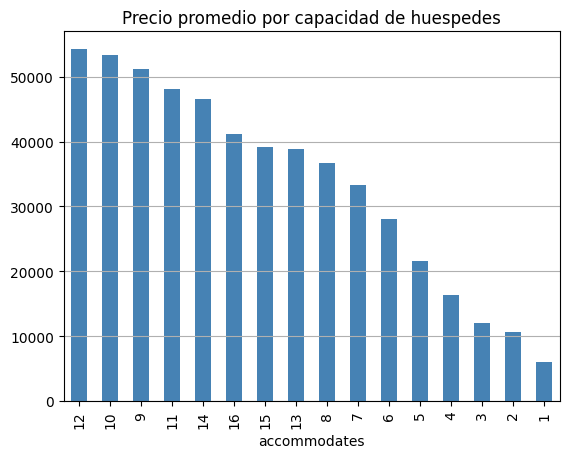

In [93]:
average_price.sort_values(ascending=False).plot(kind="bar", color="steelblue")
plt.title("Precio promedio por capacidad de huespedes")
plt.grid(axis="y")
plt.show()

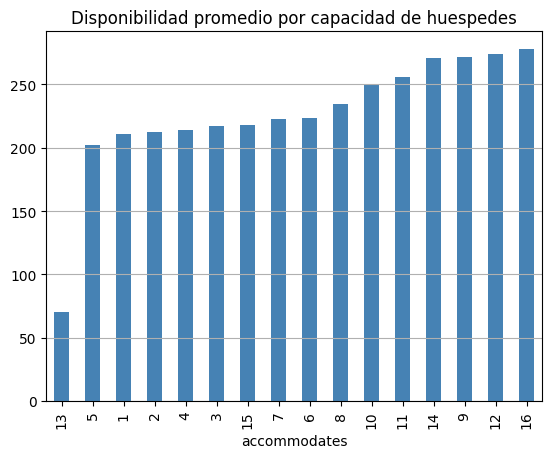

In [29]:
availability_365.sort_values(ascending=True).plot(kind="bar", color="steelblue")
plt.title("Disponibilidad promedio por capacidad de huespedes")
plt.grid(axis="y")
plt.show()

##### Precio y disponibilidad promedio por tipo de propiedad

In [95]:
grouped = listings_df.groupby('property_type')
average_price = grouped["price_float"].mean()
average_price.name = "average_price"

count = grouped["price_float"].count()
count.name="count"

availability_365 = grouped["availability_365"].mean()
availability_365.name = "availability_365"

df = pd.concat([average_price,count,availability_365],axis=1)
df["relative_count"] = (df["count"]/listings_df["price_float"].count())*100
df["average_price_discounted"] = (df["average_price"]*((365-df["availability_365"])/365))
df["relative_count_int"] = df["relative_count"].astype('int')
df["occupancy"] = 365-df["availability_365"]
print(df.sort_values(by=["average_price"],ascending=False))

                                    average_price  count  availability_365  \
property_type                                                                
Entire villa                          52160.60000     15         186.33333   
Entire chalet                         45521.75000      4         272.25000   
Entire cabin                          30472.66667      3         242.00000   
Room in boutique hotel                29217.18000     50         261.84000   
Entire home                           28812.31364    440         221.81136   
Pension                               26828.00000      1         170.00000   
Private room in chalet                26495.00000      2          83.50000   
Entire townhouse                      26233.94118     34         210.73529   
Private room in resort                25551.00000      1           0.00000   
Room in serviced apartment            24373.76471     17         320.23529   
Room in hotel                         22203.78161     87        

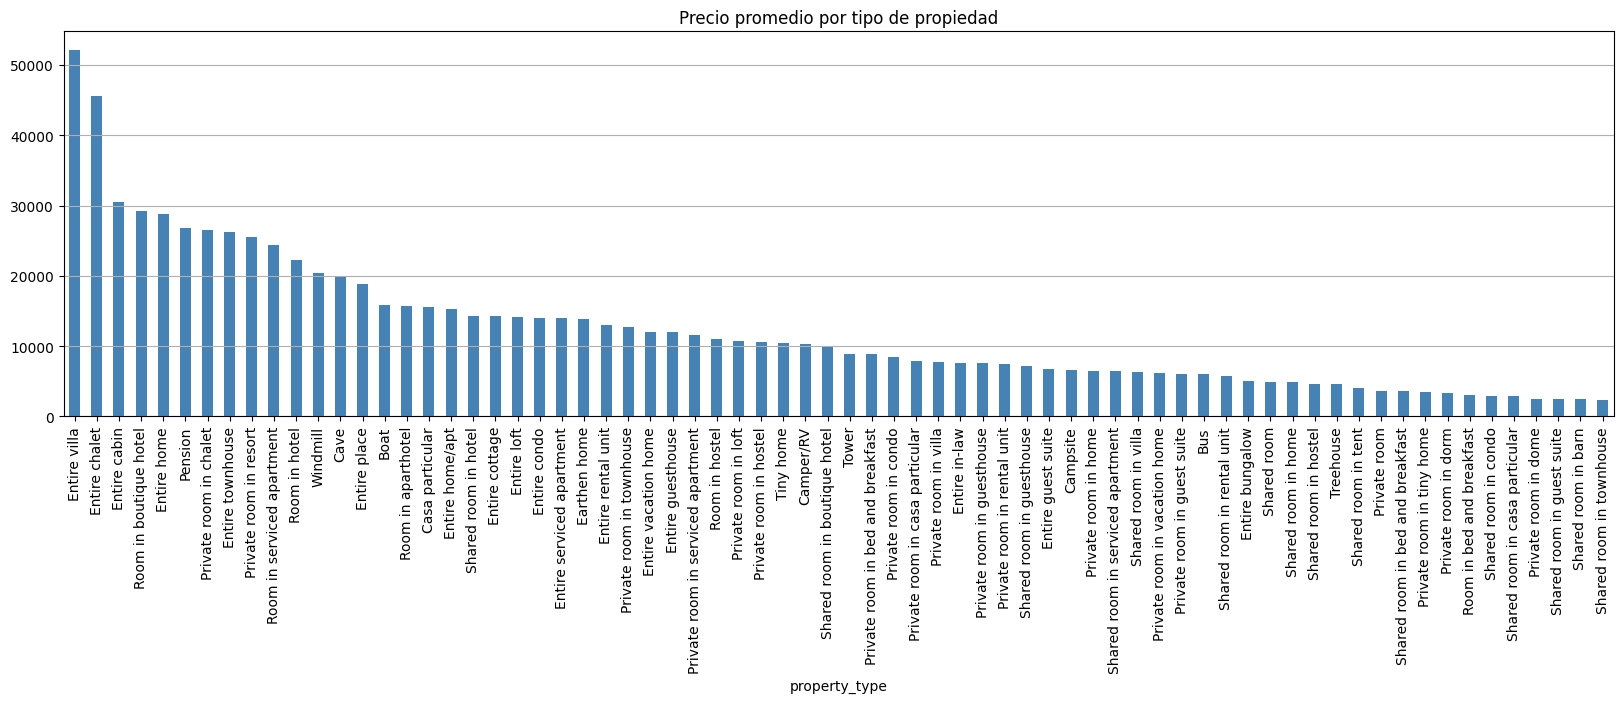

In [96]:
plt.figure(figsize=(20, 5))
average_price.sort_values(ascending=False).plot(kind="bar", color="steelblue")
plt.title("Precio promedio por tipo de propiedad")
plt.grid(axis="y")
plt.show()

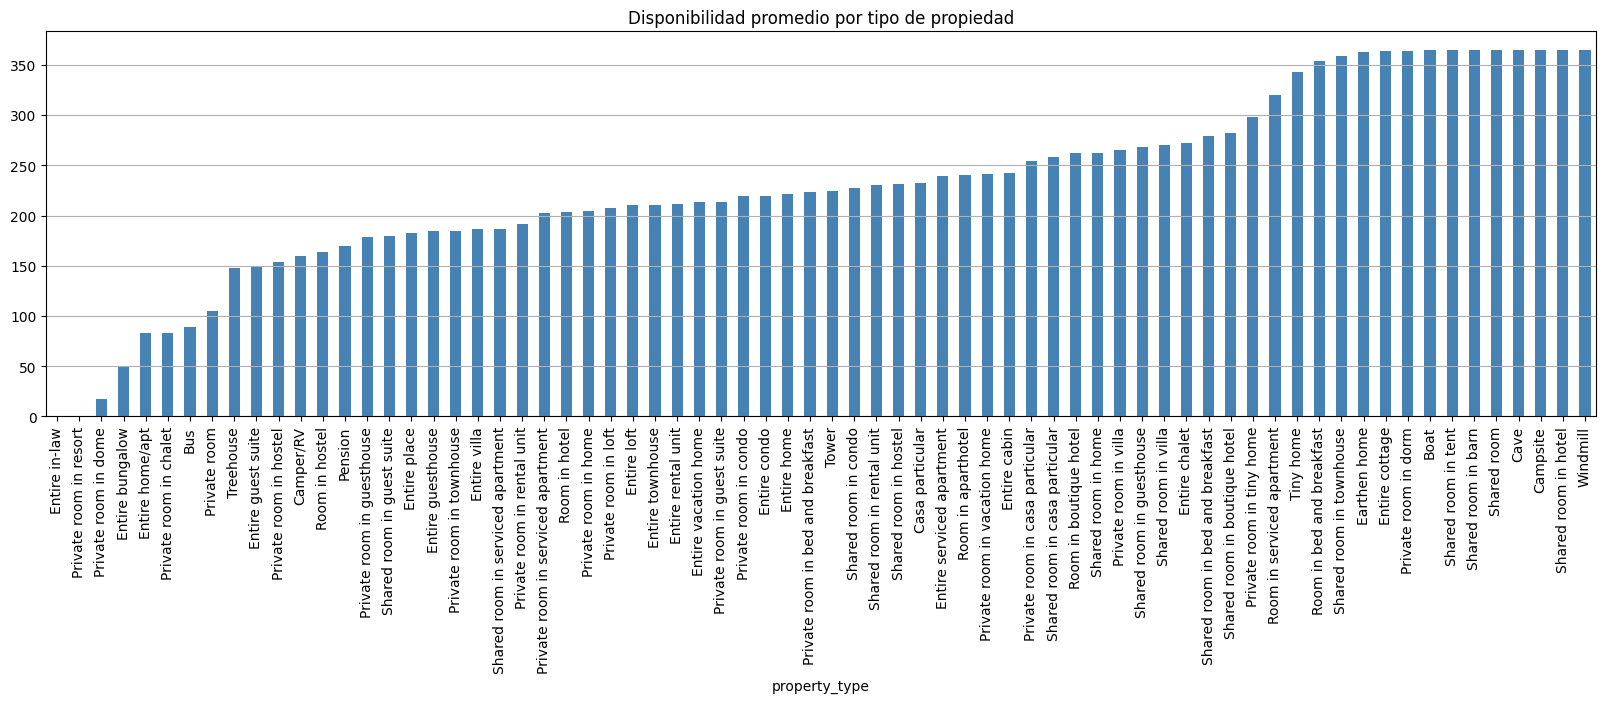

In [97]:
plt.figure(figsize=(20, 5))
availability_365.sort_values(ascending=True).plot(kind="bar", color="steelblue")
plt.title("Disponibilidad promedio por tipo de propiedad")
plt.grid(axis="y")
plt.show()

Se realiza un gráfico de burbujas para mostrar la relación entre precio por noche (eje x), ocupación en el año (eje y), entendida como 365 - availability_365, y número de propiedades por tipo de propiedad (tamaño de la burbuja)

In [98]:
fig = go.Figure()

for ind in df.index:
    fig.add_trace(go.Scatter(
        x=[df["average_price"][ind]], y=[df["occupancy"][ind]],
        name=ind,
        marker_size=df["relative_count_int"][ind],
        ))

fig.update_layout(
    title='Precio por noche vs ocupación en el año - Tipo de propiedad',
    xaxis=dict(
        title='Precio por noche',
    ),
    yaxis=dict(
        title='Ocupación en el año (dias)',
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)')

fig.show()